# Arrival Delay Analysis

Imports:

In [ ]:
import pandas as pd
from plotnine import *
import statistics as sm
import scipy as sp
import scikit_posthocs as scp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap



filteredAirlines = pd.read_csv('DestAirport_withblocks.csv')
delayedAirlines = filteredAirlines[filteredAirlines["ArrDel15"] == 1]

<>:12: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\D'
C:\Users\jadev\AppData\Local\Temp\ipykernel_18044\1822676555.py:12: SyntaxWarning: invalid escape sequence '\D'
  filteredAirlines = pd.read_csv('D:\Data\DestAirport_withblocks.csv')
C:\Users\jadev\AppData\Local\Temp\ipykernel_18044\1822676555.py:12: SyntaxWarning: invalid escape sequence '\D'


ModuleNotFoundError: No module named 'scikit_posthocs'

Median Arrival Delays per Week, ArrDelay15 == 1

In [11]:
#Monday, includes both early and late departures
medMondayDelay = sm.median(delayedAirlines[delayedAirlines['DayOfWeek'] == 1]["ArrDelay"])
print(f"Median Monday Arrival Delay: {medMondayDelay}")

#Tuesday, includes both early and late departures
medTuesdayDelay = sm.median(delayedAirlines[delayedAirlines['DayOfWeek'] == 2]["ArrDelay"])
print(f"Median Tuesday Arrival Delay: {medTuesdayDelay}")

#Wednesday, includes both early and late departures
medWednesdayDelay = sm.median(delayedAirlines[delayedAirlines['DayOfWeek'] == 3]["ArrDelay"])
print(f"Median Wednesday Arrival Delay: {medWednesdayDelay}")

#Thursday, includes both early and late departures
medThursdayDelay = sm.median(delayedAirlines[delayedAirlines['DayOfWeek'] == 4]["ArrDelay"])
print(f"Median Thursday Arrival Delay: {medThursdayDelay}")

#Friday, includes both early and late departures
medFridayDelay = sm.median(delayedAirlines[delayedAirlines['DayOfWeek'] == 5]["ArrDelay"])
print(f"Median Friday Arrival Delay: {medFridayDelay}")

#Saturday, includes both early and late departures
medSaturdayDelay = sm.median(delayedAirlines[delayedAirlines['DayOfWeek'] == 6]["ArrDelay"])
print(f"Median Saturday Arrival Delay: {medSaturdayDelay}")

#Sunday, includes both early and late departures
medSundayDelay = sm.median(delayedAirlines[delayedAirlines['DayOfWeek'] == 7]["ArrDelay"])
print(f"Median Sunday Arrival Delay: {medSundayDelay}")

medOverallDelay = sm.median(delayedAirlines["ArrDelay"])
print(f"Median Overall Arrival Delay: {medOverallDelay}")

Median Monday Arrival Delay: 40.0
Median Tuesday Arrival Delay: 38.0
Median Wednesday Arrival Delay: 40.0
Median Thursday Arrival Delay: 40.0
Median Friday Arrival Delay: 41.0
Median Saturday Arrival Delay: 41.0
Median Sunday Arrival Delay: 40.0
Median Overall Arrival Delay: 40.0


Test is theres a significant difference between the medians.

Perform **Kruskal-Wallace** due to the lack of normality of DepDelay and multiple populations to compare. Assumping each day's distribution is identical in shape (if this assumption fails then we have distributional dominance)

In [12]:
sp.stats.kruskal(delayedAirlines[delayedAirlines['DayOfWeek'] == 1]["ArrDelay"], delayedAirlines[delayedAirlines['DayOfWeek'] == 2]["ArrDelay"], delayedAirlines[delayedAirlines['DayOfWeek'] == 3]["ArrDelay"], delayedAirlines[delayedAirlines['DayOfWeek'] == 4]["ArrDelay"], delayedAirlines[delayedAirlines['DayOfWeek'] == 5]["ArrDelay"], delayedAirlines[delayedAirlines['DayOfWeek'] == 6]["ArrDelay"], delayedAirlines[delayedAirlines['DayOfWeek'] == 7]["ArrDelay"])

KruskalResult(statistic=np.float64(211.18423303495445), pvalue=np.float64(7.877435609953968e-43))

+ p value < alpha = 0.05. We have sufficient evidence to say we deviate from equal medians. Investigate further with Dunns Test!!

Which Days are different from each other??? **Dunn's Test**!!

In [13]:
scp.posthoc_dunn(delayedAirlines, val_col='DepDelay', group_col='DayOfWeek', p_adjust="Bonferroni")

,1,2,3,4,5,6,7
1,1.000000e+00,5.015539e-11,3.763114e-08,1.925433e-11,1.000000e+00,8.640271e-18,1.000000e+00
2,5.015539e-11,1.000000e+00,1.000000e+00,1.000000e+00,1.440892e-13,4.151813e-52,7.387265e-17
3,3.763114e-08,1.000000e+00,1.000000e+00,1.000000e+00,2.431675e-10,3.194097e-47,2.137195e-13
4,1.925433e-11,1.000000e+00,1.000000e+00,1.000000e+00,2.700386e-14,2.810207e-56,7.981642e-18
5,1.000000e+00,1.440892e-13,2.431675e-10,2.700386e-14,1.000000e+00,4.235708e-17,1.000000e+00
6,8.640271e-18,4.151813e-52,3.194097e-47,2.810207e-56,4.235708e-17,1.000000e+00,1.998070e-12
7,1.000000e+00,7.387265e-17,2.137195e-13,7.981642e-18,1.000000e+00,1.998070e-12,1.000000e+00


Significant difference:
- Monday to Tuesday, Wednesday, Thursday, Saturday
- Tuesday to Friday, Saturday, Sunday
- Wednesday to Friday, Saturday, Sunday
- Thursday to Friday, Saturday, Sunday
- Friday to Saturday
- Saturday to Sunday

Insignificant difference:
- Monday to Friday, Sunday
- Tuesday to Wednesday, Thursday
- Wednesday to Thursday
- Friday to Sunday

## Delay per Quarter

C:\Users\mvvogels\AppData\Local\Temp\2\ipykernel_11336\1368554900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


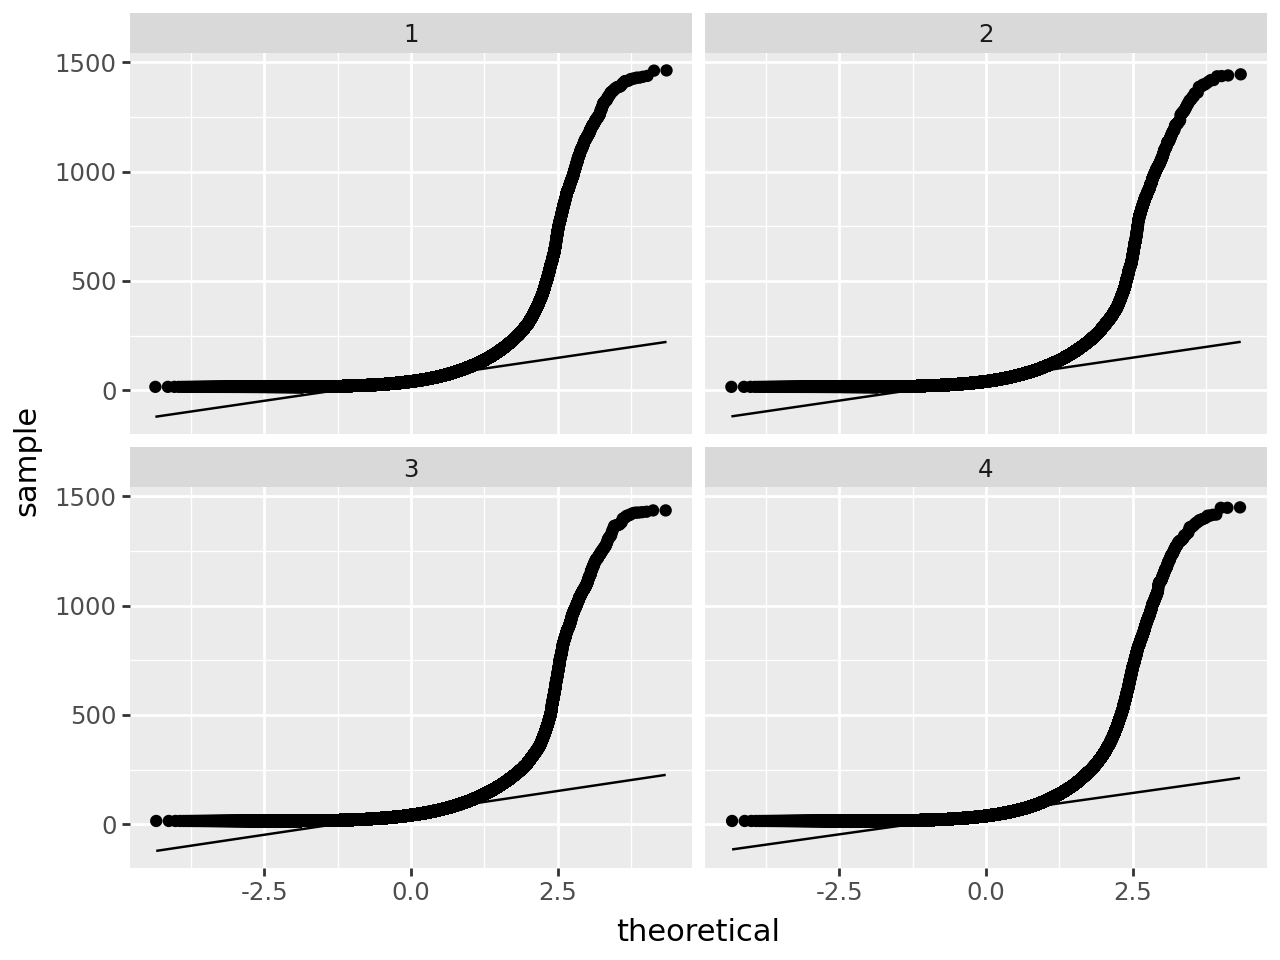

In [29]:
delayedAirlines['Quarter'] = delayedAirlines['Quarter'].astype('category')

p = (
    ggplot(delayedAirlines, aes(sample = 'ArrDelay')) 
    + stat_qq() + stat_qq_line()
    + facet_wrap('Quarter')
)
p.show()

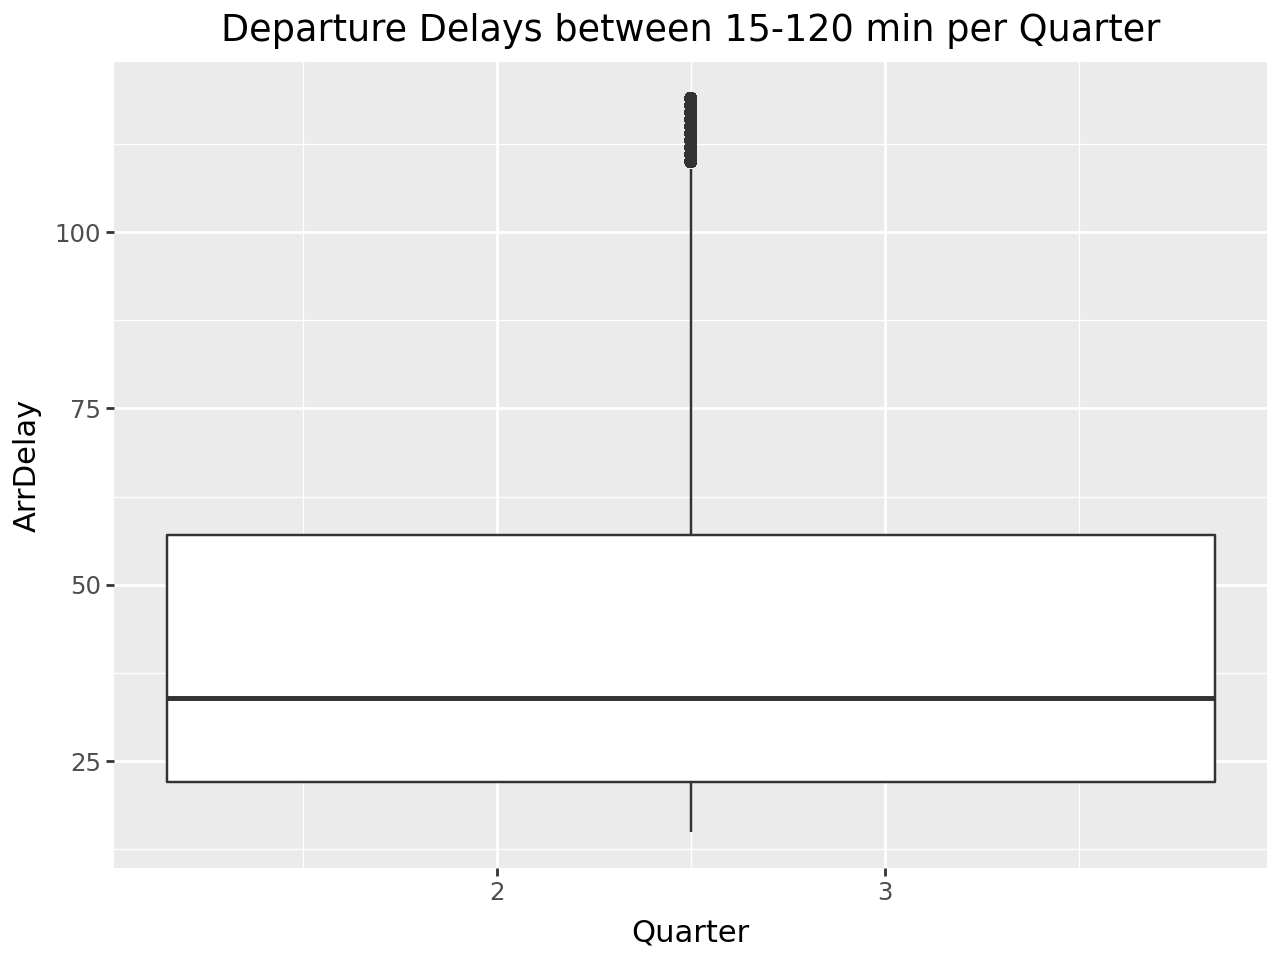

In [28]:
p = (
    ggplot(delayedAirlines[delayedAirlines['ArrDelay'] < 120], aes(y = 'ArrDelay', x = 'Quarter', fill = 'Quarter'))
    + geom_boxplot() + labs(title= 'Departure Delays between 15-120 min per Quarter')
)

p.show()

In [ ]:
#Q1, includes both early and late 
medQ1Delay = sm.median(delayedAirlines[delayedAirlines['Quarter'] == 1]["ArrDelay"])
print(f"Median Q1 Arrival Delay: {medQ1Delay}")

#Q2, includes both early and late 
medQ2Delay = sm.median(delayedAirlines[delayedAirlines['Quarter'] == 2]["ArrDelay"])
print(f"Median Q2 Arrival Delay: {medQ2Delay}")

#Q3, includes both early and late 
medQ3Delay = sm.median(delayedAirlines[delayedAirlines['Quarter'] == 3]["ArrDelay"])
print(f"Median Q3 Arrival Delay: {medQ3Delay}")

#Q4, includes both early and late 
medQ4Delay = sm.median(delayedAirlines[delayedAirlines['Quarter'] == 4]["ArrDelay"])
print(f"Median Q4 Arrival Delay: {medQ4Delay}")

medianQDelay = sm.median(delayedAirlines["ArrDelay"])
print(f"Median Overall Arrival Delay: {medianQDelay}")

Median Q1 Arrival Delay: 39.0
Median Q2 Arrival Delay: 40.0
Median Q3 Arrival Delay: 42.0
Median Q4 Arrival Delay: 38.0
Median Overall Arrival Delay: 40.0


Kruskal-Wallace: pairwise test of ArrDelay comparison over Quarter

In [18]:
sp.stats.kruskal(delayedAirlines[delayedAirlines['Quarter'] == 1]["ArrDelay"], delayedAirlines[delayedAirlines['Quarter'] == 2]["ArrDelay"], delayedAirlines[delayedAirlines['Quarter'] == 3]["ArrDelay"], delayedAirlines[delayedAirlines['Quarter'] == 4]["ArrDelay"])

KruskalResult(statistic=np.float64(289.2134615859337), pvalue=np.float64(2.148513130063161e-62))

- p < alpha, reject H0, theres a significant departure from equal Arrival Delay over the quarters

In [20]:
scp.posthoc_dunn(delayedAirlines, val_col='ArrDelay', group_col='Quarter', p_adjust="Bonferroni")

,1,2,3,4
1,1.000000e+00,7.411963e-03,3.204323e-27,6.380312e-09
2,7.411963e-03,1.000000e+00,1.773414e-13,4.280972e-19
3,3.204323e-27,1.773414e-13,1.000000e+00,2.621640e-61
4,6.380312e-09,4.280972e-19,2.621640e-61,1.000000e+00


All quarters a significantly different from each other.

## Delay per Time of Day

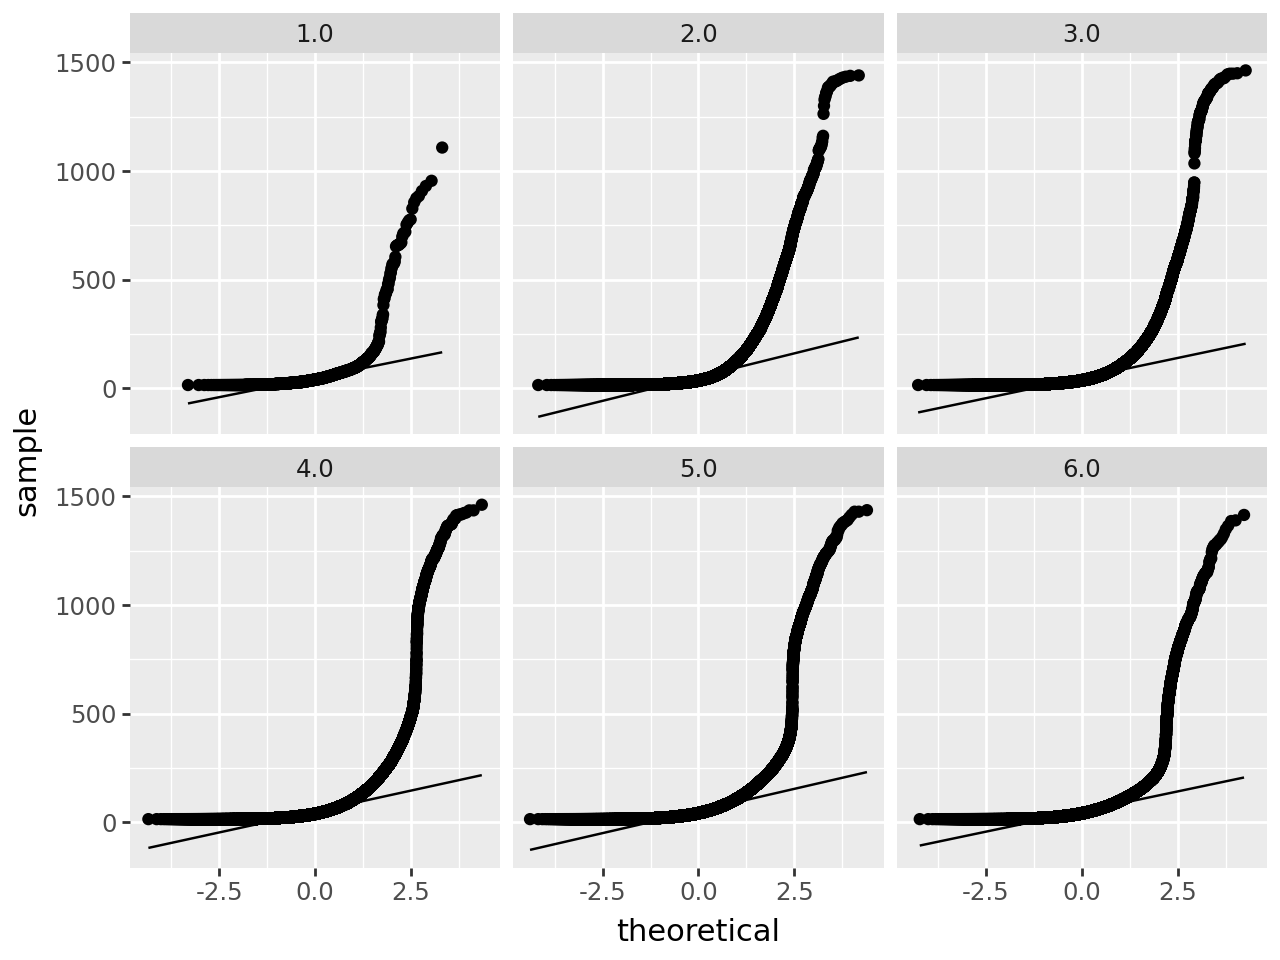

In [30]:
p = (
    ggplot(delayedAirlines, aes(sample = 'ArrDelay')) 
    + stat_qq() + stat_qq_line()
    + facet_wrap('TIME_OF_DAY')
)
p.show()

C:\Users\mvvogels\AppData\Local\Temp\2\ipykernel_11336\440136101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


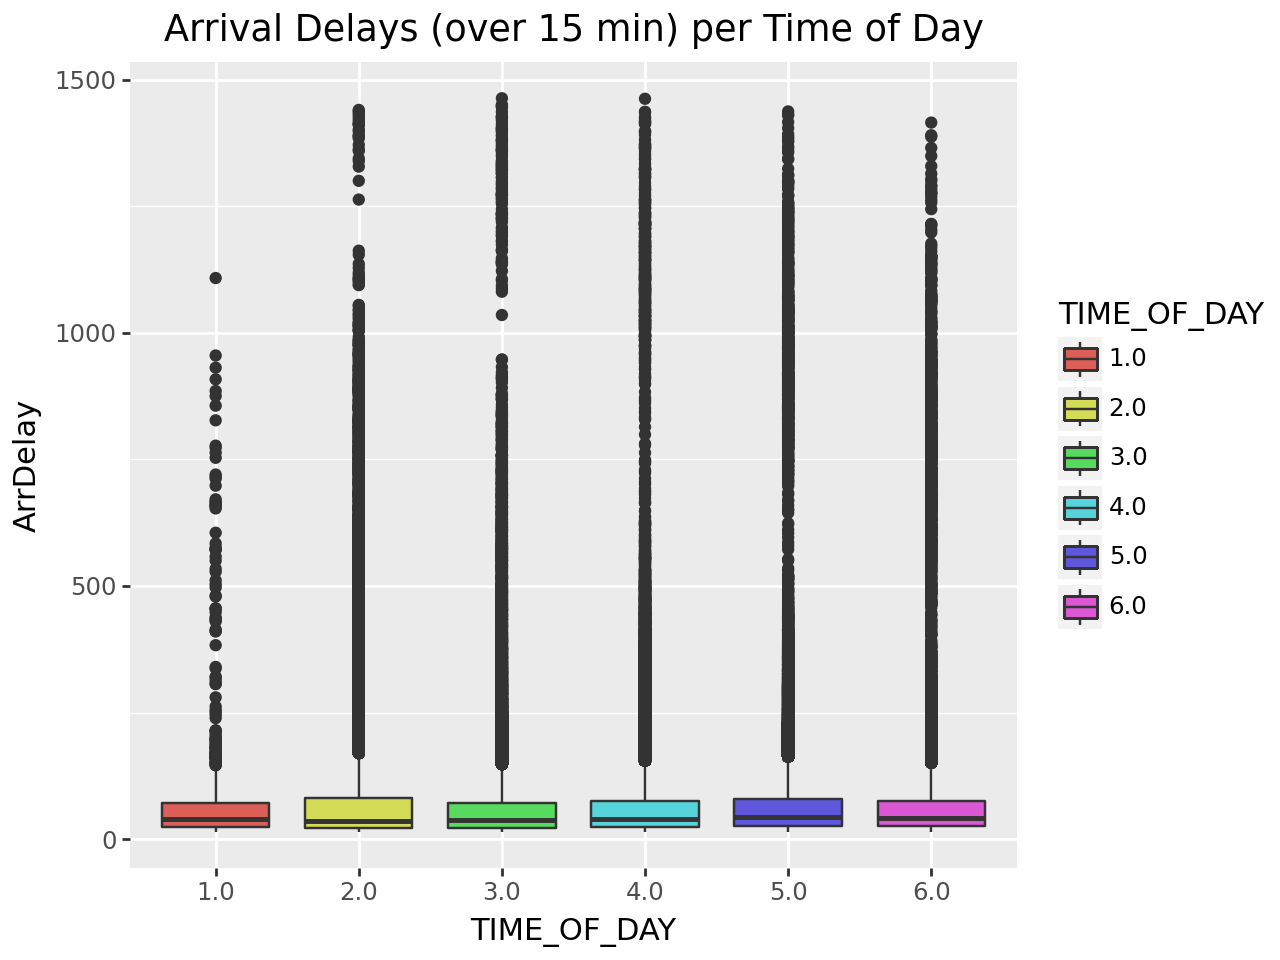

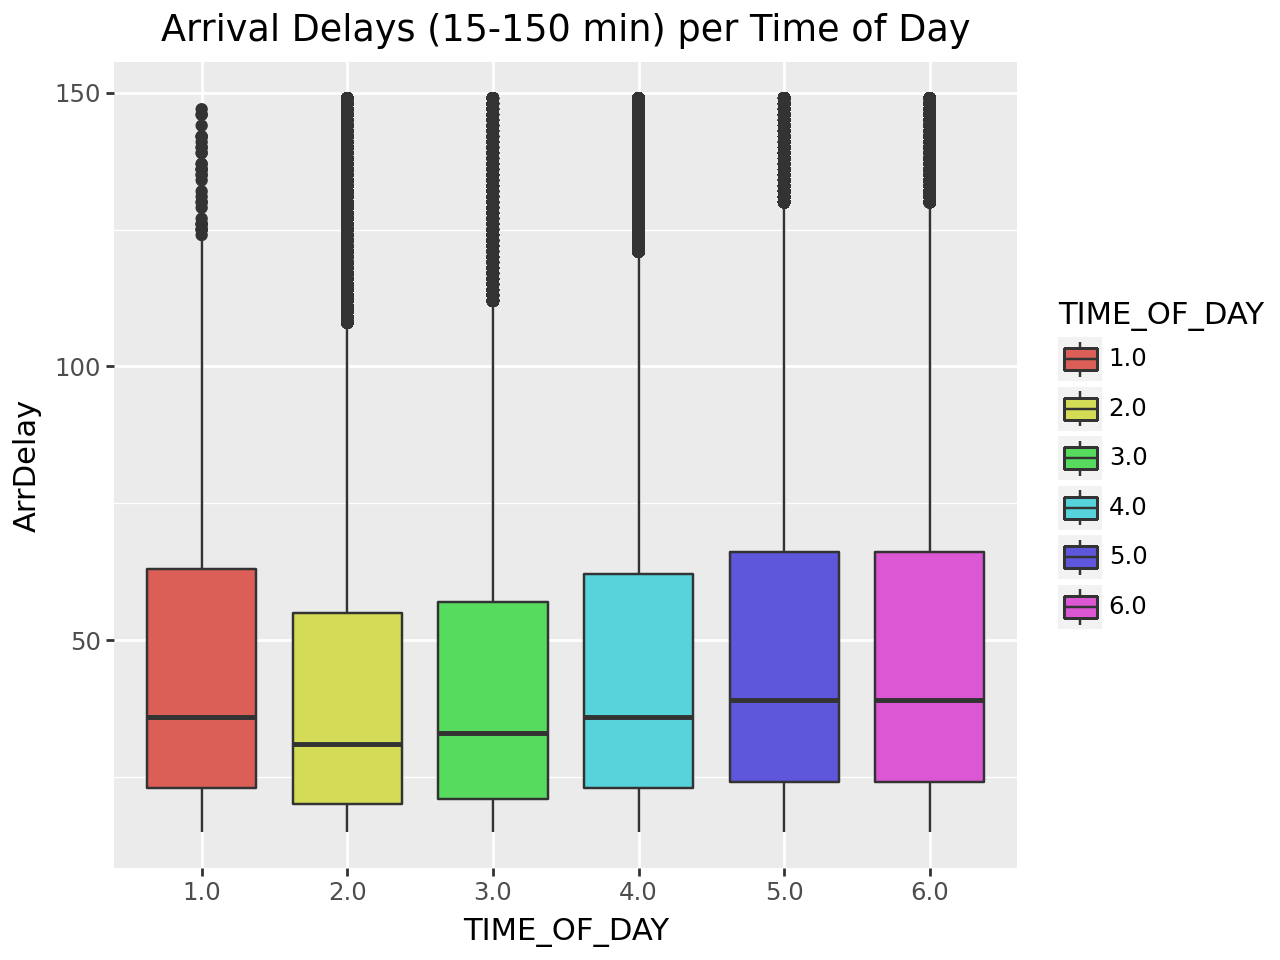

In [34]:
delayedAirlines['TIME_OF_DAY'] = delayedAirlines['TIME_OF_DAY'].astype('category')
p = (
    ggplot(delayedAirlines, aes(y = 'ArrDelay', x = 'TIME_OF_DAY', fill = 'TIME_OF_DAY'))
    + geom_boxplot() + labs(title= 'Arrival Delays (over 15 min) per Time of Day')
)
p.show()

p = (
    ggplot(delayedAirlines[delayedAirlines['ArrDelay'] < 150], aes(y = 'ArrDelay', x = 'TIME_OF_DAY', fill = 'TIME_OF_DAY'))
    + geom_boxplot() + labs(title= 'Arrival Delays (15-150 min) per Time of Day')
)
p.show()

In [35]:
#T1, includes both early and late 
medT1Delay = sm.median(delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 1]["ArrDelay"])
print(f"Median T1 Arrival Delay: {medT1Delay}")

medT2Delay = sm.median(delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 2]["ArrDelay"])
print(f"Median T2 Arrival Delay: {medT2Delay}")

medT3Delay = sm.median(delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 3]["ArrDelay"])
print(f"Median T3 Arrival Delay: {medT3Delay}")

medT4Delay = sm.median(delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 4]["ArrDelay"])
print(f"Median T4 Arrival Delay: {medT4Delay}")

medT5Delay = sm.median(delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 5]["ArrDelay"])
print(f"Median T5 Arrival Delay: {medT5Delay}")

medT6Delay = sm.median(delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 6]["ArrDelay"])
print(f"Median T6 Arrival Delay: {medT6Delay}")

medianDelay = sm.median(delayedAirlines["ArrDelay"])
print(f"Median Overall Arrival Delay: {medianDelay}")


Median T1 Arrival Delay: 40.0
Median T2 Arrival Delay: 36.0
Median T3 Arrival Delay: 37.0
Median T4 Arrival Delay: 39.0
Median T5 Arrival Delay: 43.0
Median T6 Arrival Delay: 42.0
Median Overall Arrival Delay: 40.0


Kruskal-Wallace: pairwise test of ArrDelay comparison over TIME_OF_DAY

In [36]:
sp.stats.kruskal(delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 1]["ArrDelay"], delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 2]["ArrDelay"], delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 3]["DepDelay"], delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 4]["ArrDelay"], delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 5]["ArrDelay"], delayedAirlines[delayedAirlines['TIME_OF_DAY'] == 6]["ArrDelay"])

KruskalResult(statistic=np.float64(3753.801536007256), pvalue=np.float64(0.0))

- p < alpha, reject H0, theres a significant departure from equal Arrival Delay over TIME_OF_DAY

Dig in further with Dunn's Test:

In [37]:
scp.posthoc_dunn(delayedAirlines, val_col='ArrDelay', group_col='TIME_OF_DAY', p_adjust="Bonferroni")

,1.0,2.0,3.0,4.0,5.0,6.0
1.0,1.000000,1.000000e+00,8.142852e-01,1.000000e+00,3.526118e-02,6.452068e-01
2.0,1.000000,1.000000e+00,1.000000e+00,8.391484e-22,1.641591e-105,1.189996e-49
3.0,0.814285,1.000000e+00,1.000000e+00,5.951852e-39,5.694640e-163,2.105228e-74
4.0,1.000000,8.391484e-22,5.951852e-39,1.000000e+00,2.116257e-49,7.041245e-12
5.0,0.035261,1.641591e-105,5.694640e-163,2.116257e-49,1.000000e+00,3.285182e-06
6.0,0.645207,1.189996e-49,2.105228e-74,7.041245e-12,3.285182e-06,1.000000e+00


Different Medians
- 1 to 5
- 2 to 4, 5, 6
- 3 to 4, 5, 6
- 4 to 5, 6
- 5 to 6

Similar Medians
- 1 to 2, 4, 6
- 2 to 3, 4

In [38]:
# --- IMPORTANT: Placeholder for your DataFrame ---
# You need to load your 'delayedAirlines' DataFrame here.
# For example, if it's a CSV file:
# delayedAirlines = pd.read_csv('your_airline_data.csv')

# --- Data Preparation ---

# 1. Ensure 'DepDelay' is numeric. Convert if necessary, handling errors.
delayedAirlines['DepDelay'] = pd.to_numeric(delayedAirlines['DepDelay'], errors='coerce')

# Optional: Drop rows where 'DepDelay' is NaN after coercion.
# delayedAirlines.dropna(subset=['DepDelay'], inplace=True)

# 2. Pivot the data to get a matrix of Median Departure Delay by Time of Day and Day of Week
# dropna=False ensures all combinations of TIME_OF_DAY and DayOfWeek are present,
# even if they result in NaN (which we'll fill later).
heatmap_data = delayedAirlines.pivot_table(
    index='TIME_OF_DAY',
    columns='DayOfWeek', # This will be the numerical day (1-7)
    values='DepDelay',
    aggfunc='median',
    dropna=False
)

# --- DEBUGGING STEP: Check column names right after pivot_table ---
print("--- Column names of heatmap_data right after pivot_table ---")
print(heatmap_data.columns)
# Expected output here should be Int64Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='DayOfWeek')
# If it's something else (e.g., ['Monday', 'Tuesday', ...]), then your
# 'DayOfWeek' column in the original data might already be strings,
# and the renaming step needs to be adjusted.

# 3. Map numerical DayOfWeek column names to readable names
day_name_mapping = {
    1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
    5: 'Friday', 6: 'Saturday', 7: 'Sunday'
}
# Rename the columns first
heatmap_data = heatmap_data.rename(columns=day_name_mapping)

# --- DEBUGGING STEP: Check column names after renaming ---
print("\n--- Column names of heatmap_data after renaming ---")
print(heatmap_data.columns)
# Expected output here should be Index(['Monday', 'Tuesday', ...], dtype='object')

# 4. Reorder columns to ensure proper display sequence
ordered_day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(columns=ordered_day_names)

# --- DEBUGGING STEP: Check heatmap_data after column reindexing ---
print("\n--- heatmap_data after column renaming and reindexing (should show numbers or NaNs) ---")
print(heatmap_data.head()) # Check the first few rows

# 5. Map numerical TIME_OF_DAY index to names and reorder index
time_of_day_mapping = {
    1.0: '12AM-3:59AM',
    2.0: '4AM-7:59AM',
    3.0: '8AM-11:59AM',
    4.0: '12PM-3:59PM',
    5.0: '4PM-7:59PM',
    6.0: '8PM-11:59PM'
}
heatmap_data = heatmap_data.rename(index=time_of_day_mapping)

ordered_time_names = [
    '12AM-3:59AM', '4AM-7:59AM', '8AM-11:59AM',
    '12PM-3:59PM', '4PM-7:59PM', '8PM-11:59PM'
]
heatmap_data = heatmap_data.reindex(index=ordered_time_names)

# --- DEBUGGING STEP: Check heatmap_data after row reindexing (should still show numbers or NaNs) ---
print("\n--- heatmap_data after all renaming and reindexing (should show numbers or NaNs) ---")
print(heatmap_data.head())
print(f"Number of NaN values in heatmap_data before fillna: {heatmap_data.isnull().sum().sum()}")


# 6. Fill any remaining NaN values in the heatmap_data with 0.
heatmap_data = heatmap_data.fillna(0)

# --- DEBUGGING STEP: Final check of heatmap_data before plotting ---
print("\n--- Final heatmap_data (should be numbers only, no NaNs) ---")
print(heatmap_data)
print(f"Number of NaN values in heatmap_data after fillna: {heatmap_data.isnull().sum().sum()}")


# --- Colormap Definition ---
colors = [
    (0.0, "#E3DBEB"),
    (0.25, "#B9A0D1"),
    (0.5, "#7C57A1"),
    (0.75, "#552586"),
    (1.0, "#210042")
]
custom_cmap = LinearSegmentedColormap.from_list("my_custom_delay_cmap", colors)

# --- Create the Heatmap ---
plt.figure(figsize=(12, 8))

sns.heatmap(
    heatmap_data,
    annot=True,
    cmap=custom_cmap,
    fmt=".1f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Median Departure Delay (minutes)'}
)

plt.title("Median Departure Delay by Time of Day and Day of Week", fontsize=16)
plt.ylabel("Time of Day", fontsize=12)
plt.xlabel("Day of Week", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

--- Column names of heatmap_data right after pivot_table ---
Index([1, 2, 3, 4, 5, 6, 7], dtype='int64', name='DayOfWeek')

--- Column names of heatmap_data after renaming ---
Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='DayOfWeek')

--- heatmap_data after column renaming and reindexing (should show numbers or NaNs) ---
DayOfWeek    Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
TIME_OF_DAY                                                                
1.0            45.0     50.0       39.0      43.5    45.0      51.0    44.0
2.0            31.0     30.0       32.0      27.0    28.0      38.0    34.0
3.0            36.0     36.0       36.0      32.0    34.0      39.0    38.0
4.0            40.0     39.0       38.0      38.0    39.0      42.0    38.0
5.0            43.0     41.0       42.0      43.0    45.0      46.5    44.0

--- heatmap_data after all renaming and reindexing (should show numbe

C:\Users\mvvogels\AppData\Local\Temp\2\ipykernel_11336\2523655183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mvvogels\AppData\Local\Temp\2\ipykernel_11336\2523655183.py:17: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior


NameError: name 'LinearSegmentedColormap' is not defined